# Sentiment Analysis for IMDB reviews

**Objective:** Identify sentiment for IMDB reviews to determine whether it matches the target sentiment for the movie.

**Note:** Using Kaggle IMDB Spoiler Dataset for movie reviews, need to input with Mike's cleaned data for plot + movie reviews

### 1. Sentiment Analysis using NLTK Sentiment Intensity Analyzer (VADER)

#### Import Libraries

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
sent_analyzer = SentimentIntensityAnalyzer()

#### Load Datasets

In [3]:
import json

Movie review dataset

In [4]:
with open("IMDB_reviews.json", 'r') as f:
    json_data = f.read()

# Split the file contents into individual JSON objects
json_objects = json_data.strip().split('\n')

# Load each JSON object and store them in a list
loaded_data = []
for obj in json_objects:
    data = json.loads(obj)
    loaded_data.append(data)

# # Now, you can access the loaded_data list to work with your JSON data
# # For example, to access the first JSON feed:
# first_feed = loaded_data[0]
# print(first_feed)  # Replace this with your desired processing of the JSON data

In [67]:
loaded_data[1]

{'review_date': '6 September 2000',
 'movie_id': 'tt0111161',
 'user_id': 'ur0842118',
 'is_spoiler': True,
 'review_text': 'The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart. The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it\'s almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife. The story focuses on Andy\'s relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank. Bob Gunton is positively evil and frightening as Warden Norton, and there are great performances and cameos all around; the most prominent one being Gil

Movie plot dataset

In [5]:
with open("IMDB_movie_details.json", 'r') as f:
    json_data = f.read()

# Split the file contents into individual JSON objects
json_objects = json_data.strip().split('\n')

# Load each JSON object and store them in a list
loaded_plots = []
for obj in json_objects:
    data = json.loads(obj)
    loaded_plots.append(data)

Merged dataset based on movie ID:

In [6]:
merged_list = [dict1 | dict2 for dict1 in loaded_data for dict2 in loaded_plots if dict1["movie_id"] == dict2["movie_id"]]

In [76]:
merged_list[1]['review_text']

'The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart. The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it\'s almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife. The story focuses on Andy\'s relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank. Bob Gunton is positively evil and frightening as Warden Norton, and there are great performances and cameos all around; the most prominent one being Gil Bellows (late as Billy of Ally McBeal) as Tommy, a fellow inmate of Andy\'s who suffers under the iron will of Norton.If yo

In [110]:
loaded_plots[2]

{'movie_id': 'tt0243655',
 'plot_summary': "The setting is Camp Firewood, the year 1981. It's the last day before everyone goes back to the real world, but there's still a summer's worth of unfinished business to resolve. At the center of the action is camp director Beth, who struggles to keep order while she falls in love with the local astrophysics professor. He is busy trying to save the camp from a deadly piece of NASA's Skylab which is hurtling toward earth. All that, plus: a dangerous waterfall rescue, love triangles, misfits, cool kids, and talking vegetable cans. The questions will all be resolved, of course, at the big talent show at the end of the day.                Written by\nSujit R. Varma",
 'duration': '1h 37min',
 'genre': ['Comedy', 'Romance'],
 'rating': '6.7',
 'release_date': '2002-04-11',
 'plot_synopsis': ''}

Attach movie name based on movie ID from a titles.aka.tsv.gz dataset:

Load dataset:

In [7]:
#import the required Library
import pandas as pdd
#Select all columns 
#dff = pdd.read_csv("title.akas.tsv.gz",sep="\t")
#Select specified columns 
dff = pdd.read_csv("title.akas.tsv.gz",sep="\t", usecols = ['titleId','title'])
#print the dataframe header and some rows
dff.head()

,titleId,title
0,tt0000001,Карменсіта
1,tt0000001,Carmencita
2,tt0000001,Carmencita - spanyol tánc
3,tt0000001,Καρμενσίτα
4,tt0000001,Карменсита


In [114]:
type(dff)

pandas.core.frame.DataFrame

Remove duplicates:

In [115]:
dff.columns

Index(['titleId', 'title'], dtype='object')

In [117]:
for col in dff.columns:
    is_unique = not dff[col].duplicated().any()
    print(f"{col} is unique: {is_unique}")

titleId is unique: False
title is unique: False


There will still be duplicated title ID if we only use drop_duplicate directly. The duplicate is due to titles in different language. Hence, I combined the titles under the same title id after dropping duplicates:

In [8]:
dff_no_duplicates = dff.drop_duplicates()

In [123]:
for col in dff_no_duplicates.columns:
    is_unique = not dff_no_duplicates[col].duplicated().any()
    print(f"{col} is unique: {is_unique}")

titleId is unique: False
title is unique: False


In [15]:
dff_no_duplicates['title'] = dff_no_duplicates['title'].astype(str)

C:\Users\jessi\AppData\Local\Temp\ipykernel_23980\3643846293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_no_duplicates['title'] = dff_no_duplicates['title'].astype(str)


In [16]:
df_final = dff_no_duplicates.groupby('titleId')['title'].agg(', '.join).reset_index()

In [20]:
desired_titleId = 'tt0243655'

filtered_titles = df_final[df_final['titleId'] == desired_titleId]['title']

# Print the titles matching the desired titleId
print(filtered_titles)

232297    Wet Hot American Summer, ウェット・ホット・アメリカン・サマー, 웻...
Name: title, dtype: object


### Test sentences/reviews

Use nltk to split review text into sentences:

In [84]:
import nltk
nltk.download('punkt')  # Download the necessary data for tokenization (only need to run once)

def split_into_sentences(text):
    # Use the punkt tokenizer to split the text into sentences
    sentences = nltk.sent_tokenize(text)
    return sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [83]:
hotel_review = merged_list[1]['review_text']

In [88]:
# Example usage:
text = hotel_review
sentences = split_into_sentences(text)
print(sentences)

['The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen.', 'Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart.', "The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it's almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife.", 'The story focuses on Andy\'s relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank.', "Bob Gunton is positively evil and frightening as Warden Norton, and there are great performances and cameos all around; the most prominent one being Gil Bellows (late as Billy of Ally McBeal) as Tommy, a fellow inmate of Andy's who suffers under the iron will of N

### Calculate and print the polarity scores

#### Apply the sentiment analyzer to 1 review

In [89]:
sent = sentences[0]
sent

'The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen.'

In [90]:
sent_analyzer.polarity_scores(sent)

{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7354}

#### Apply the sentiment analyzer to all reviews: the higher the compound score, the more positive the review is

In [91]:
for sentence in sentences:
    scores = sent_analyzer.polarity_scores(sentence)
    print(sentence)
    print(scores)
    print()

The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen.
{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7354}

Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart.
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.5572}

The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it's almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife.
{'neg': 0.178, 'neu': 0.691, 'pos': 0.131, 'compound': -0.5853}

The story focuses on Andy's relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank.
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.8225}

Bob Gunton is positively evil 

#### Compound score

Let $s_i$ be the valence of each sentiment features, then

$S = \sum_i s_i$ is the total sentiment score. Because it is a simple sum, $S \in (-\infty, \infty)$ 

$S$ can be mapped to $(-1, 1)$ by using the following normalization function:

$C = \frac{S}{\sqrt{S^2+\alpha}}$

Where $C$ is the compound score, and $\alpha$ is a smoothing parameter

In [92]:
def normalize(score, alpha=15):
    import math
    
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    return norm_score

Plotting the normalization function

In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
S = list(np.linspace(-10, 10, 1000))

In [95]:
C = [normalize(s) for s in S]

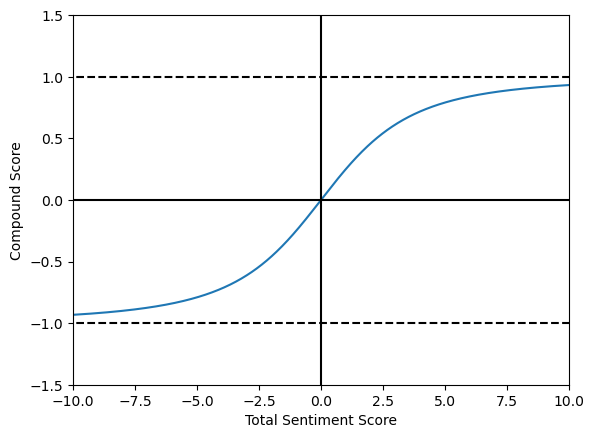

In [96]:
plt.plot(S, C)
plt.hlines(0, -20, 20, 'k')
plt.hlines(1, -20, 20, 'k', linestyle='--')
plt.hlines(-1, -20, 20, 'k', linestyle='--')
plt.vlines(0, -1.5, 1.5, 'k')
plt.axis([-10, 10, -1.5, 1.5])
plt.xlabel('Total Sentiment Score')
plt.ylabel('Compound Score')
pass

### 2. Sentiment Analysis using Naive Bayes Classifier (training and validation)

#### Training set: list of (text, label) tuples

In [12]:
training_set = [("Great resort to stay in when you visit the Dominican Republic.","pos"),
                ("Rooms were under renovation when I visited, so the availability was limited.","neg"),
                ("Love the ocean breeze and the food.","pos"),
                ("The food is delicious but not over the top.","neg"),
                ("Service - Little slow, probably because of too many people.","neg"),
                ("The place is not easy to find.","neg"),
                ("V interesting!","pos"),
                ("V much interesting!","neg"),
                ("Does that add value?!","neg"),
                ("Prawns cooked in a local specialty sauce were tasty.", "pos")]

#### Step 1: Create a dictionary of tokens 

In [13]:
# Using the nltk word tokenizer

from nltk.tokenize import word_tokenize

In [14]:
dictionary = set(word.lower() for passage in training_set for word in word_tokenize(passage[0]))

In [15]:
len(dictionary)

63

In [16]:
print(dictionary)

{'.', 'little', 'is', 'many', 'stay', 'over', 'to', 'availability', 'of', 'much', '-', 'value', 'visited', 'specialty', 'tasty', 'service', 'local', 'under', 'but', 'rooms', '?', 'i', 'was', 'the', 'slow', 'great', 'renovation', ',', 'visit', 'you', 'v', 'cooked', 'prawns', 'easy', 'interesting', 'when', '!', 'ocean', 'because', 'resort', 'probably', 'add', 'dominican', 'so', 'and', 'too', 'place', 'find', 'were', 'does', 'love', 'that', 'sauce', 'delicious', 'top', 'food', 'people', 'a', 'in', 'republic', 'breeze', 'limited', 'not'}


#### Step 2: Vector Space Representation (binary)

In [17]:
t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in training_set]

In [18]:
print(t[0])

({'.': True, 'little': False, 'is': False, 'many': False, 'stay': True, 'over': False, 'to': True, 'availability': False, 'of': False, 'much': False, '-': False, 'value': False, 'visited': False, 'specialty': False, 'tasty': False, 'service': False, 'local': False, 'under': False, 'but': False, 'rooms': False, '?': False, 'i': False, 'was': False, 'the': True, 'slow': False, 'great': False, 'renovation': False, ',': False, 'visit': True, 'you': True, 'v': False, 'cooked': False, 'prawns': False, 'easy': False, 'interesting': False, 'when': True, '!': False, 'ocean': False, 'because': False, 'resort': True, 'probably': False, 'add': False, 'dominican': False, 'so': False, 'and': False, 'too': False, 'place': False, 'find': False, 'were': False, 'does': False, 'love': False, 'that': False, 'sauce': False, 'delicious': False, 'top': False, 'food': False, 'people': False, 'a': False, 'in': True, 'republic': False, 'breeze': False, 'limited': False, 'not': False}, 'pos')


#### Step 3: Train the Naive Bayes Classifier

In [19]:
classifier = nltk.NaiveBayesClassifier.train(t)

#### Step 4: Test

#### Test 1

In [20]:
test_data = "The food was delicious and spicy"

In [21]:
# binary representation
test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}

In [22]:
print (classifier.classify(test_data_features))

pos


#### Test 2

In [23]:
test_data = "Just way V interesting."

In [24]:
# Binary representation
test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}

In [25]:
print (classifier.classify(test_data_features))

pos


### 3. Subjectivity analysis using NLTK

#### Import libraries and initialize the sentiment analyzer

In [26]:
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import mark_negation, extract_unigram_feats
from nltk.classify import NaiveBayesClassifier

In [27]:
sentim_analyzer = SentimentAnalyzer()

#### Obtain a set of 1000 subjective and 1000 objective sentences from NLTK subjectivity corpus

In [28]:
n_instances = 1000
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(1000, 1000)

#### Split into training and testing sets

In [29]:
train_subj_docs = subj_docs[:800]
test_subj_docs = subj_docs[800:1000]
train_obj_docs = obj_docs[:800]
test_obj_docs = obj_docs[800:1000]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

#### Add feature extractions to the sentiment analyzer

##### Marking negation words

In [30]:
# example
print(mark_negation('He is not feeling well today'.split()))

['He', 'is', 'not', 'feeling_NEG', 'well_NEG', 'today_NEG']


In [31]:
def negation(docs):
    return [mark_negation(doc) for doc in docs]

In [32]:
all_words_neg = sentim_analyzer.all_words(negation(training_docs))

##### Use simple unigram word features, handling negation:

In [33]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)

In [34]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

#### Apply features to obtain a feature-value representation of the datasets

In [35]:
training_set = sentim_analyzer.apply_features(negation(training_docs))
test_set = sentim_analyzer.apply_features(negation(testing_docs))

### Train classifier and output evaluation results

In [36]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


In [37]:
# Training accuracies
print('Training set:')
for key,value in sorted(sentim_analyzer.evaluate(training_set).items()):
    print('{0}: {1}'.format(key, value))

Training set:
Evaluating NaiveBayesClassifier results...
Accuracy: 0.903125
F-measure [obj]: 0.8999354422207875
F-measure [subj]: 0.9061175045427015
Precision [obj]: 0.9305740987983978
Precision [subj]: 0.8789659224441834
Recall [obj]: 0.87125
Recall [subj]: 0.935


In [38]:
# Testing accuracies
print('Test set:')
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Test set:
Evaluating NaiveBayesClassifier results...
Accuracy: 0.835
F-measure [obj]: 0.828125
F-measure [subj]: 0.8413461538461539
Precision [obj]: 0.8641304347826086
Precision [subj]: 0.8101851851851852
Recall [obj]: 0.795
Recall [subj]: 0.875


### Test the classifier

In [39]:
# Test sentences
subj_test_sentences = ['I think this is the worst movie ever made.',
                       'This food is amazing.',
                       'The best way to spend an afternoon is walking in the park.']
obj_test_sentences = ['The sky is blue.',
                     'New York is next to an ocean.',
                     'Columbia is a well-renowned Universty.']

# Combining the test sentences
all_sentences = subj_test_sentences + obj_test_sentences

In [40]:
all_sentences

['I think this is the worst movie ever made.',
 'This food is amazing.',
 'The best way to spend an afternoon is walking in the park.',
 'The sky is blue.',
 'New York is next to an ocean.',
 'Columbia is a well-renowned Universty.']

In [41]:
# Tokenize and apply the negatoin words

sentences = negation([word_tokenize(s) for s in all_sentences])

In [42]:
# Apply the classifier

for i in range(len(sentences)):
    print(all_sentences[i])
    print('Prediction:', sentim_analyzer.classify(sentences[i]))
    print()

I think this is the worst movie ever made.
Prediction: subj

This food is amazing.
Prediction: subj

The best way to spend an afternoon is walking in the park.
Prediction: subj

The sky is blue.
Prediction: obj

New York is next to an ocean.
Prediction: obj

Columbia is a well-renowned Universty.
Prediction: subj

